# Predição de gorjeta do Taxi 

Objetivo:

*   Fazer o preprocessamento do dados usando Scikit_Learn
*   Usar o modelo de regresão com Scikit_Learn and Snap ML Pyhton APIs
*   Treinar a Regressão com ávore de decisão usando  Scikit_Learn and Snap ML.
*   Avaliar os modelos treinados

**Introdução** 

Os dados usado nesse exercicio é público pode ser encontrado em : https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Vamos baixar o dados :

## Biblioteca 

In [1]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error
import time
import warnings
import gc, sys
warnings.filterwarnings('ignore')

## Analisando os dados 

Baixar os dados, descomentar se não ttiver baixando ainda .

In [2]:
#from urllib import request
#url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/yellow_tripdata_2019-06.csv'
#file = 'taxi_dados.csv'
#request.urlretrieve(url,file)

Com os arquivos baixados apenas precisamos chamar

In [3]:
dt = pd.read_csv('taxi_dados.csv')

In [4]:
dt

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.00,1.0,N,145.0,145.0,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.00,1.0,N,262.0,263.0,2.0,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.40,1.0,N,74.0,7.0,2.0,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.80,1.0,N,145.0,145.0,2.0,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935999,2,2019-06-17 23:27:54,2019-06-17 23:37:37,1.0,3.36,1.0,N,75.0,161.0,1.0,11.5,0.5,0.5,0.00,0.0,0.3,15.30,2.5
3936000,2,2019-06-17 23:41:25,2019-06-17 23:48:50,1.0,1.64,1.0,N,161.0,234.0,1.0,8.0,0.5,0.5,4.00,0.0,0.3,15.80,2.5
3936001,2,2019-06-17 23:47:39,2019-06-17 23:54:02,5.0,2.00,1.0,N,211.0,186.0,2.0,7.5,0.5,0.5,0.00,0.0,0.3,11.30,2.5
3936002,2,2019-06-17 23:55:44,2019-06-18 00:06:50,5.0,3.06,1.0,N,164.0,236.0,2.0,11.5,0.5,0.5,0.00,0.0,0.3,15.30,2.5


Cada linha representa um viajem de taxi.

A variavel **"total_amount"** é a variavel target(variavel que quereremos predizer)!

Nosso objetivo é prever qual é o valor da gorjeta em uma viaje de taxi. Algumas vezes não há gorjeta, logo iremos retirar ese caso, pois vamo supor que vai ter gorjeta.

In [5]:
dt =  dt[ dt['tip_amount']> 0 ] 
# O argumento "dt['tip_amount']> 0" vai fornecer uma sequência de valores True e False.
# Se a gorjeta for maior que zero então é verdadeiro, caso contraio falso.
# Quando jogamos essas sequencia dentor de um data_frama do panda, ele irá eliminar os valores falso.
dt

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,14.30,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,12.30,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,42.35,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,8.0,0.5,0.5,2.95,0.0,0.3,14.75,2.5
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,7.5,0.5,0.5,1.08,0.0,0.3,12.38,2.5
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,11.5,0.5,0.5,1.50,0.0,0.3,14.30,0.0


Podemos observa que o número de linha(row), está menor.

Iremos remover os caso onde o preço do "FARE AMOUNT"  é menor que "TIP AMOUNT"

In [6]:
dt =  dt[ dt['tip_amount'] <= dt['fare_amount']]
#dt

Iremos remover agora viajem com o custo muito grande e maior que 2.

In [7]:
dt =  dt[(dt['fare_amount']>2)&(dt['fare_amount']<200) ]
# conseguir obeder as duas condições ao mesmo tempo, foi usado o operador &.
# Ele faz a sequinte condição: so é verdaderio se o primeiro e o segundo for verdaderio, caso contrário é falso.
#dt

Por fim, iremos remover a variável target

In [8]:
dt_x =  dt.drop(['total_amount'],axis=1)
# axis =1 , siginifica coluna , axis =0 significa linha.

Liveraremos a memoria ocupado por "dt", pois não usamoremos mais.
Nos casos anterios onde os dados eram pequenos, não precisavamos nos preocupar com esse detalhe, mas agora sim. Para garanter que teremos memoria suficiente iremos deletar a variavel dt.

In [9]:
del dt
gc.collect()

0

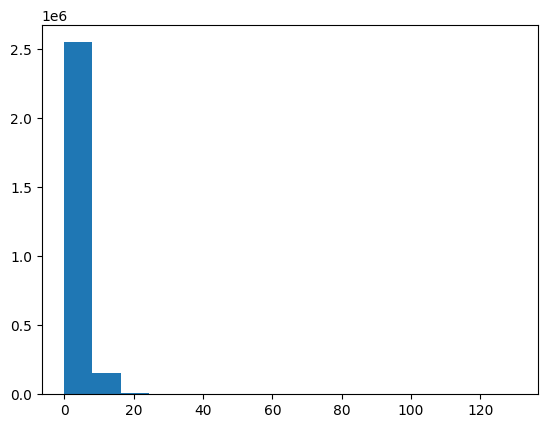

Valor mínimo é  0.01
Valor máximo é  130.0
90% dos valores da viajem são menor ou igual que  5.95


In [10]:
plt.hist(dt_x.tip_amount.values,16,histtype="bar")
# Acima estou dizendo : pegue os valores do dataframa "dt_x",
# e plote um histogrma desses valores, usando barras.
plt.show()
print("Valor mínimo é ", np.min(dt_x.tip_amount.values))
print("Valor máximo é ", np.max(dt_x.tip_amount.values))
print("90% dos valores da viajem são menor ou igual que ", np.percentile(dt_x.tip_amount.values, 90))

In [11]:
dt_x.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,9.5,3.0,0.5,2.65,0.0,0.3,2.5
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,9.5,3.0,0.5,1.00,0.0,0.3,2.5
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,7.5,3.0,0.5,1.00,0.0,0.3,2.5
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,31.5,3.0,0.5,7.05,0.0,0.3,2.5
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,11.0,0.5,0.5,2.96,0.0,0.3,2.5


Olhando os dados podemos observar informação do momento de entrada e saida, e outras variáves que devem ser ajudatada para entra no modelo.

Então precisamos realizar um pre-processameno dos dados.

## Pre-processamento de dados.

Ao analisar os dados criamos uma outra variável que está armazenado nosso dados para treino, mais ainda precisamos fazer algumas etapas para ajustar e dados de treino para nosso modelo. Nesta sub-seção, nos dedicaremos a isso.

In [12]:
dt_x['tpep_dropoff_datetime']

4          2019-06-01 00:15:42
5          2019-06-01 00:39:23
7          2019-06-01 01:02:57
9          2019-06-01 01:03:13
10         2019-06-01 00:16:06
                  ...         
3935995    2019-06-17 23:39:55
3935996    2019-06-18 00:09:48
3935997    2019-06-18 00:08:13
3935998    2019-06-17 23:00:40
3936000    2019-06-17 23:48:50
Name: tpep_dropoff_datetime, Length: 2712718, dtype: object

In [13]:
pd.to_datetime(dt_x['tpep_dropoff_datetime'])

4         2019-06-01 00:15:42
5         2019-06-01 00:39:23
7         2019-06-01 01:02:57
9         2019-06-01 01:03:13
10        2019-06-01 00:16:06
                  ...        
3935995   2019-06-17 23:39:55
3935996   2019-06-18 00:09:48
3935997   2019-06-18 00:08:13
3935998   2019-06-17 23:00:40
3936000   2019-06-17 23:48:50
Name: tpep_dropoff_datetime, Length: 2712718, dtype: datetime64[ns]

Qual a diferença entre esses dois resultados ?

Se você olha com atenção notará que o dtype passou de 'object' para 'datatime64[ns]'. 

Para alterar o dados que usaremos como treino, devemos fazer :

In [14]:
dt_x['tpep_dropoff_datetime'] = pd.to_datetime(dt_x['tpep_dropoff_datetime'])
dt_x['tpep_pickup_datetime'] = pd.to_datetime(dt_x['tpep_pickup_datetime'])

Podemos pegar apenas a informação do dia,hora, segundo, semana ... separadamente .

In [15]:
dt_x['pickup_hour']  = dt_x['tpep_pickup_datetime'].dt.hour
dt_x['dropoff_hour'] = dt_x['tpep_dropoff_datetime'].dt.hour

dt_x['pickup_day']   = dt_x['tpep_pickup_datetime'].dt.weekday
dt_x['dropoff_day']  = dt_x['tpep_dropoff_datetime'].dt.weekday

Agora queremso saber o tempo total de cada viajem. 

In [16]:
dt_x['trip_time'] = (dt_x['tpep_dropoff_datetime'] - dt_x['tpep_pickup_datetime']).astype('timedelta64[m]')

# a função '.astype('timedelta64[m]') é utilizado para convereter em minuto.

In [17]:
dt_x

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_time
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,...,0.5,2.65,0.0,0.3,2.5,0,0,5,5,12.0
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,0,5,5,10.0
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,1,5,5,8.0
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,...,0.5,7.05,0.0,0.3,2.5,0,1,5,5,34.0
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,...,0.5,2.96,0.0,0.3,2.5,0,0,5,5,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,2,2019-06-17 23:31:56,2019-06-17 23:39:55,5.0,1.82,1.0,N,230.0,143.0,1.0,...,0.5,2.95,0.0,0.3,2.5,23,23,0,0,7.0
3935996,2,2019-06-18 00:01:57,2019-06-18 00:09:48,1.0,1.36,1.0,N,79.0,68.0,1.0,...,0.5,1.08,0.0,0.3,2.5,0,0,1,1,7.0
3935997,2,2019-06-17 23:57:45,2019-06-18 00:08:13,1.0,3.00,1.0,N,144.0,100.0,1.0,...,0.5,2.96,0.0,0.3,2.5,23,0,0,1,10.0
3935998,2,2019-06-17 22:49:23,2019-06-17 23:00:40,1.0,2.73,1.0,N,238.0,116.0,1.0,...,0.5,1.50,0.0,0.3,0.0,22,23,0,0,11.0


Nosso data frame tem 2 milhoes 712 mil e 718 viajem. Que é uma quantidade bem grande, dependendo do seu computado você tera dificuldade de rodar todo o dados, levando muito tempo. Portanto, você pode pegar apenas uma parte. 

No meu caso irei pegar 1 milhão !

In [18]:
dt_x = dt_x.head(1000000)
dt_x

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,pickup_hour,dropoff_hour,pickup_day,dropoff_day,trip_time
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.70,1.0,N,113.0,148.0,1.0,...,0.5,2.65,0.0,0.3,2.5,0,0,5,5,12.0
5,1,2019-06-01 00:28:31,2019-06-01 00:39:23,2.0,1.60,1.0,N,79.0,125.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,0,5,5,10.0
7,1,2019-06-01 00:54:49,2019-06-01 01:02:57,2.0,1.20,1.0,N,79.0,249.0,1.0,...,0.5,1.00,0.0,0.3,2.5,0,1,5,5,8.0
9,1,2019-06-01 00:29:12,2019-06-01 01:03:13,1.0,8.60,1.0,N,186.0,243.0,1.0,...,0.5,7.05,0.0,0.3,2.5,0,1,5,5,34.0
10,2,2019-06-01 00:01:48,2019-06-01 00:16:06,1.0,1.74,1.0,N,107.0,148.0,1.0,...,0.5,2.96,0.0,0.3,2.5,0,0,5,5,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442465,2,2019-06-07 03:51:50,2019-06-07 04:02:58,1.0,2.83,1.0,N,125.0,170.0,1.0,...,0.5,2.96,0.0,0.3,2.5,3,4,4,4,11.0
1442466,2,2019-06-07 03:16:59,2019-06-07 03:31:54,1.0,4.10,1.0,N,114.0,181.0,1.0,...,0.5,3.86,0.0,0.3,2.5,3,3,4,4,14.0
1442467,2,2019-06-07 03:04:31,2019-06-07 03:23:19,2.0,6.80,1.0,N,114.0,166.0,1.0,...,0.5,2.00,0.0,0.3,2.5,3,3,4,4,18.0
1442468,1,2019-06-07 03:34:59,2019-06-07 03:49:44,1.0,7.80,1.0,N,140.0,25.0,1.0,...,0.5,2.50,0.0,0.3,2.5,3,3,4,4,14.0


Como criamos duas novas colunas com informção do dia, hora e tempo de viajem , não necessitamos mas das colunas "tpep_dropoff_datetime" e "tpep_pickup_datetime".

In [19]:
dt_x = dt_x.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

Algumas caracteristica são categoricas, usaremos a função 'get_dummies' que ira dividir a coluna na quantidade de variaveis diferente dentro da coluna. 

Ex.: Se temos uma coluna com apenas SIM e NÂO , então detemos duas colunas. 

A primeira é a do SIM, onde tinha sim será substituido por 0 e aonde tem Não será 0. o Mesmo aconte para a colna do Não, mas ao contrario  

In [20]:
get_dummy_col = ["VendorID","RatecodeID","store_and_fwd_flag","PULocationID", "DOLocationID","payment_type", "pickup_hour", "dropoff_hour", "pickup_day", "dropoff_day"]
dt_x2 = pd.get_dummies(dt_x, columns = get_dummy_col)
dt_x2

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_time,...,pickup_day_4,pickup_day_5,pickup_day_6,dropoff_day_0,dropoff_day_1,dropoff_day_2,dropoff_day_3,dropoff_day_4,dropoff_day_5,dropoff_day_6
4,1.0,1.70,9.5,3.0,0.5,2.65,0.0,0.3,2.5,12.0,...,0,1,0,0,0,0,0,0,1,0
5,2.0,1.60,9.5,3.0,0.5,1.00,0.0,0.3,2.5,10.0,...,0,1,0,0,0,0,0,0,1,0
7,2.0,1.20,7.5,3.0,0.5,1.00,0.0,0.3,2.5,8.0,...,0,1,0,0,0,0,0,0,1,0
9,1.0,8.60,31.5,3.0,0.5,7.05,0.0,0.3,2.5,34.0,...,0,1,0,0,0,0,0,0,1,0
10,1.0,1.74,11.0,0.5,0.5,2.96,0.0,0.3,2.5,14.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442465,1.0,2.83,11.0,0.5,0.5,2.96,0.0,0.3,2.5,11.0,...,1,0,0,0,0,0,0,1,0,0
1442466,1.0,4.10,15.5,0.5,0.5,3.86,0.0,0.3,2.5,14.0,...,1,0,0,0,0,0,0,1,0,0
1442467,2.0,6.80,20.5,0.5,0.5,2.00,0.0,0.3,2.5,18.0,...,1,0,0,0,0,0,0,1,0,0
1442468,1.0,7.80,22.5,3.0,0.5,2.50,0.0,0.3,2.5,14.0,...,1,0,0,0,0,0,0,1,0,0


Não usaremos mais os dados dt_x, então vamos deleta-lo

In [21]:
del dt_x
gc.collect()

3811

Por fim, vamos separar nossos em dois grupos 

In [22]:
Y     = dt_x2[['tip_amount']].values.astype('float32')
# vamos retirar 'tip_amount' do dt_x2
dt_x2 = dt_x2.drop(['tip_amount'], axis=1)
X     = dt_x2.values
# Normalizando as caracteristica
X     = normalize(X,axis=1,norm='l1',copy=False) 
print('X.shape=', X.shape, 'Y.shape=', Y.shape)

X.shape= (1000000, 574) Y.shape= (1000000, 1)


**Divisão dos dados de Treino e Teste**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

## Modelo  com scikit-Learn

In [25]:
from sklearn.tree import DecisionTreeRegressor

skl_dt =  DecisionTreeRegressor(max_depth=8,random_state=35) # Criando o objeto.
t0 =  time.time()                                              # Setando um tempo inicial   
skl_dt.fit(X_train, y_train)                                   # Fitando o modelo com os dados de treino
skl_time = time.time()-t0                                      # Tempo final 

 [Sckikit-Learn] Trainin time (s):


In [27]:
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(skl_time))

[Scikit-Learn] Training time (s):  68.64484


Vamos contruir um modelo usando outra biblioteca para depois camparar.

## Modelo  com Snap ML

In [29]:
from snapml import DecisionTreeRegressor
# em contraste com o scklearn  o snap Ml oferece o modo fe treino usando multi-threaded CPU/GPU.
# Para usar a GPU presisa informa na função 
#  --->>>> snapml_dt_GPU = DecisionTreeRegressor(max_depth=8, random_state=45, use_gpu=True)
snapml_dt = DecisionTreeRegressor(max_depth=8, random_state=45, n_jobs=4)
t0 = time.time()
snapml_dt.fit(X_train, y_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  6.43307


ja podemos notar que nese caso temos a compilação ~10x mais rápido.

## Avaliando os modelos

**Velocidade**

In [30]:
Velocidade_de_treino = skl_time/snapml_time
print("Velocidade do Snap ML vs Scikit-learn ",Velocidade_de_treino )

Velocidade do Snap ML vs Scikit-learn  10.670620130339774


**Predição**

Na predição devemos usar os dados separados para teste, para verificar a qualidade do nosso modelo.

Portanto,**(1)** vamos fazer a preddição com X_test; **(2)** Usar alguma medida de erro e avaliar

In [31]:
sklearn_pred = skl_dt.predict(X_test)                           
sklearn_mse  = mean_squared_error(y_test, sklearn_pred)
print('[Scikit-Learn] MSE score : {0:.3f}'.format(sklearn_mse))

snapml_pred  = snapml_dt.predict(X_test)
snapml_mse   = mean_squared_error(y_test, snapml_pred)
print('[Snap ML] MSE score : {0:.3f}'.format(snapml_mse))

[Scikit-Learn] MSE score : 1.635
[Snap ML] MSE score : 1.710


In [32]:
sklearn_mse - snapml_mse

-0.07509003431360384

Podemo ver que o Scikit-Learn fornece um score um pouco melhor(~0.075). Mais em contra-partida é 10x mais lento.